In [2]:
import numpy as np
import scipy
import scipy.optimize as opt
import scipy.sparse as sp

import matplotlib.pyplot as plt

In [19]:
N = 25
s = np.linspace(0, 1, N+1)
h = 1/N

g = 9.8
vmax = 50.
amin = -2.*g
amax = 4.*g
mu = 5.

x_0 = 12.5
x_1 = -12.5
y_0 = 0.
y_1 = 0.
v_0 = 17.5

In [20]:
# initial solution
x0 = 12.5*np.cos(np.pi*s)[1:-1]
y0 = 12.5*np.sin(np.pi*s)[1:-1]
v0 = v_0*np.ones(N)

In [21]:
print(x0.shape, y0.shape, v0.shape)

(24,) (24,) (25,)


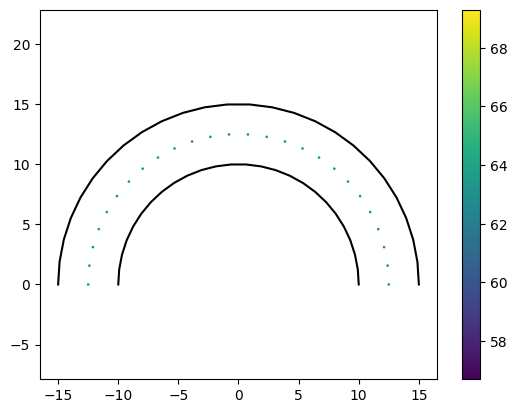

In [22]:
plt.axis('equal')
plt.plot(10*np.cos(np.pi*s), 10*np.sin(np.pi*s), 'black')
plt.scatter(np.r_[x_0, x0, x_1], np.r_[y_0, y0, y_1], c=np.r_[v_0, v0]*3.6, s=.8)
plt.plot(15*np.cos(np.pi*s), 15*np.sin(np.pi*s), 'black')
plt.colorbar()

In [23]:
D1 = sp.diags([-1, 0, 1], offsets=[0, 1, 2], shape=(N-1, N+1))
D2 = sp.diags([1, -2, 1], offsets=[0, 1, 2], shape=(N-1, N+1))

D1 = sp.vstack([sp.csr_array([-3, 4, -1]+[0]*(N-2)), D1, sp.csr_array([0]*(N-2)+[1, -4, 3])])
D2 = sp.vstack([sp.csr_array([2, -5, 4, -1]+[0]*(N-3)), D2, sp.csr_array([0]*(N-3) + [-1, 4, -5, 2])])

D1 = D1/(2*h)
D2 = D2/(h**2)

In [24]:
def f(params):
    Loss = 0.
    x, y, v = params[:N-1], params[N-1:2*(N-1)], params[2*(N-1):]
    x_ = np.r_[x_0, x, x_1]
    y_ = np.r_[y_0, y, y_1]
    v_ = np.r_[v_0, v]
    D1x_ = D1@x_
    D1y_ = D1@y_
    d = (D1x_**2 + D1y_**2)**.5

    Loss += d@(1 / v_) * h

    # Loss += np.sum(np.max(np.c_[-v_, np.zeros_like(v_)], axis=1))
    # Loss += np.sum(np.max(np.c_[v_ - vmax, np.zeros_like(v_)], axis=1))
    
    # aT = v_*(D1@v_)/d
    # Loss += np.sum(np.max(np.c_[amin - aT, np.zeros_like(aT)], axis=1))
    # Loss += np.sum(np.max(np.c_[aT-amax, np.zeros_like(aT)], axis=1))

    # aN = v_**2 * np.abs(D2@x_ * D1y_ - D2@y_*D1x_)/d**3
    # Loss += np.sum(np.max(np.c_[aN - mu*g, np.zeros_like(aN)], axis=1))
    
    # r = (x_**2 + y_**2)**.5
    # Loss += np.sum(np.max(np.c_[r - 15., np.zeros_like(r)], axis=1))
    # Loss += np.sum(np.max(np.c_[10. - r, np.zeros_like(r)], axis=1))
    return Loss

In [25]:
params = np.r_[x0, y0, v0]

In [26]:
f(params)

2.3290290594577603

In [27]:
res = opt.minimize(f, params, method='trust-constr', options={
    'xtol': 1e-16,
    'maxiter': 1e3,
    'verbose': 3,
})

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------|
|   1   |  74   |   0   | +2.3290e+00 | 1.00e+00 | 8.66e-02 | 0.00e+00 | 1.00e+00 |   0   |
|   2   |  148  |   1   | +2.3107e+00 | 1.00e+00 | 8.66e-02 | 0.00e+00 | 1.00e+00 |   4   |
|   3   |  222  |   2   | +2.3107e+00 | 1.00e-01 | 8.66e-02 | 0.00e+00 | 1.00e+00 |   2   |
|   4   |  296  |   4   | +2.2977e+00 | 7.00e-01 | 8.64e-02 | 0.00e+00 | 1.00e+00 |   2   |
|   5   |  370  |   6   | +2.2977e+00 | 7.00e-02 | 8.64e-02 | 0.00e+00 | 1.00e+00 |   2   |
|   6   |  444  |   9   | +2.2945e+00 | 4.90e-01 | 8.64e-02 | 0.00e+00 | 1.00e+00 |   2   |
|   7   |  518  |  12   | +2.2945e+00 | 4.90e-02 | 8.64e-02 | 0.00e+00 | 1.00e+00 |   4   |
|   8   |  592  |  16   | +2.2925e+00 | 3.43e-01 | 8.65e-02 | 0.00e+00 | 1.00e+00 |   2   |
|   9   |  666  |  20   | +2.2783e+00 | 2.40e+00 | 8.67e-02 | 0.00e+00 | 1.00e+0

In [28]:
res

          message: `xtol` termination condition is satisfied.
          success: True
           status: 2
              fun: 1.7494617414249052
                x: [ 1.207e+01  1.119e+01 ...  1.973e+01  1.893e+01]
              nit: 592
             nfev: 43512
             njev: 588
             nhev: 0
         cg_niter: 13950
     cg_stop_cond: 2
             grad: [-1.781e-02  1.165e-02 ... -3.718e-03 -2.574e-03]
  lagrangian_grad: [-1.781e-02  1.165e-02 ... -3.718e-03 -2.574e-03]
           constr: []
              jac: []
      constr_nfev: []
      constr_njev: []
      constr_nhev: []
                v: []
           method: equality_constrained_sqp
       optimality: 15.219934880805669
 constr_violation: 0
   execution_time: 20.761600017547607
        tr_radius: 6.535871102256155e-17
   constr_penalty: 1.0
            niter: 592

In [29]:
x, y, v = res.x[:N-1], res.x[N-1:2*(N-1)], res.x[2*(N-1):]

x = np.r_[x_0, x, x_1]
y = np.r_[y_0, y, y_1]
v = np.r_[v_0, v]

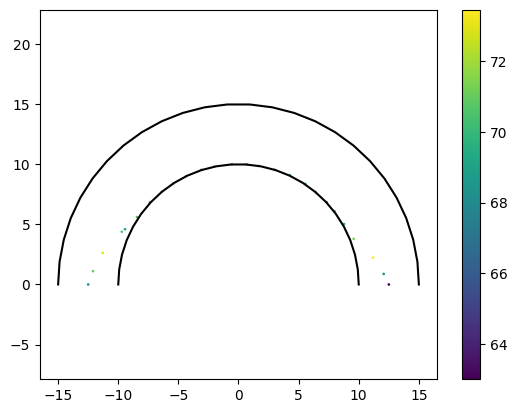

In [30]:
plt.axis('equal')
plt.plot(10*np.cos(np.pi*s), 10*np.sin(np.pi*s), 'black')
plt.scatter(x, y, c=v*3.6, s=.8)
plt.plot(15*np.cos(np.pi*s), 15*np.sin(np.pi*s), 'black')
plt.colorbar()

In [31]:
s_interp = np.linspace(0, 1, 1001)
x_interp = np.interp(s_interp, s, x)
y_interp = np.interp(s_interp, s, y)
v_interp = np.interp(s_interp, s, v)

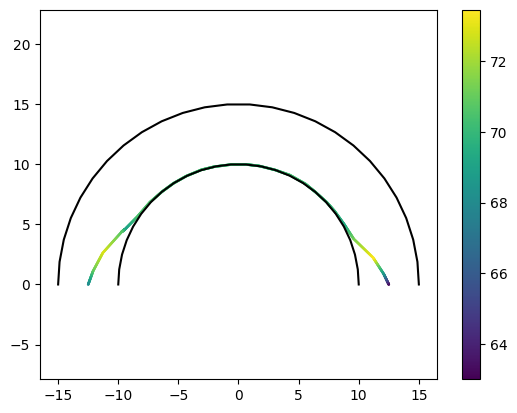

In [32]:
plt.axis('equal')
plt.plot(10*np.cos(np.pi*s), 10*np.sin(np.pi*s), 'black')
plt.scatter(x_interp, y_interp, c=v_interp*3.6, s=.8)
plt.plot(15*np.cos(np.pi*s), 15*np.sin(np.pi*s), 'black')
plt.colorbar()

In [33]:
def a_tang(params):
    x, y, v = params[:N-1], params[N-1:2*(N-1)], params[2*(N-1):]
    x_ = np.r_[x_0, x, x_1]
    y_ = np.r_[y_0, y, y_1]
    v_ = np.r_[v_0, v]
    return v_*(D1@v_)/((D1@x_)**2 + (D1@y_)**2)**.5

def a_norm(params):
    x, y, v = params[:N-1], params[N-1:2*(N-1)], params[2*(N-1):]
    x_ = np.r_[x_0, x, x_1]
    y_ = np.r_[y_0, y, y_1]
    v_ = np.r_[v_0, v]
    return v_**2 * np.abs((D2@x_) * (D1@y_) - (D2@y_)*(D1@x_))\
         /((D1@x_)**2 + (D1@y_)**2)**1.5

def xy_feasible(params):
    x, y = params[:N-1], params[N-1:2*(N-1)]
    return (x**2 + y**2)**.5

In [17]:
a_tang_constraint = opt.NonlinearConstraint(a_tang, amin, amax)
a_norm_constraint = opt.NonlinearConstraint(a_norm, -np.inf, mu*g)
v_bound = opt.LinearConstraint(np.diag([0]*(2*(N-1)) + [1]*(N)), 0., vmax)
xy_feasible_region = opt.NonlinearConstraint(xy_feasible, 10., 15.)

In [18]:
res = opt.minimize(f, params,
    method='COBYQA', 
    jac="2-point", hess=opt.SR1(),
    constraints=[a_tang_constraint, a_norm_constraint, v_bound, xy_feasible_region],
)

/var/folders/wg/qxjnfvxx0rvf882k8prmqvg40000gn/T/ipykernel_43834/239494847.py:1: RuntimeWarning: Method COBYQA does not use gradient information (jac).
  res = opt.minimize(f, params,
/var/folders/wg/qxjnfvxx0rvf882k8prmqvg40000gn/T/ipykernel_43834/239494847.py:1: RuntimeWarning: Method COBYQA does not use Hessian information (hess).
  res = opt.minimize(f, params,


KeyboardInterrupt: 

In [346]:
res

 message: Did not converge to a solution satisfying the constraints. See `maxcv` for magnitude of violation.
 success: False
  status: 4
     fun: 2.088616822026467
       x: [ 1.245e+01  1.231e+01 ...  1.847e+01  1.849e+01]
    nfev: 1000
   maxcv: 435.7405571315503